<a href="https://colab.research.google.com/github/DurgeshKShukla/Machine_Learning/blob/main/car_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/75 hard orientation/TUTORT/machine learning/linear regression/car_linear_reg_prblm/CarPrice_project.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.describe(include='all')
# if we wouldn't have put include = all then it would have given me just numerical columns
# in below 50% is median. if you see mean and median, they are very close. it means it is a normal distribution

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
len(df[df.duplicated()])

0

# **EDA**

<Axes: xlabel='price', ylabel='Density'>

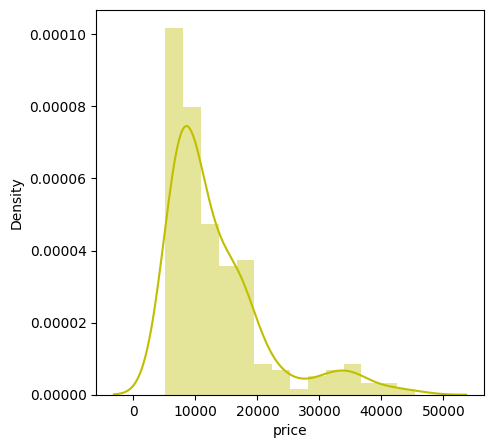

In [ ]:
# we will first find how is distribution of our dependent variable. doing so we found that data is rightly/positively skewed. there for
# moderately skewed we do log transformation, for highly skewed we go for inverse and for lighly skewed we go for mean squared. so in this case weare going for log
plt.figure(figsize=(5,5))
sns.distplot(df["price"], color="y")

<Axes: xlabel='price', ylabel='Density'>

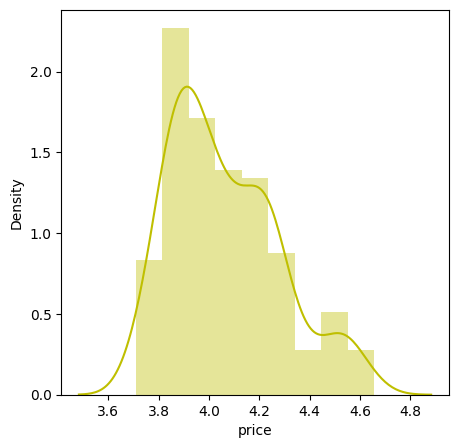

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(np.log10(df["price"]), color="y")

In [ ]:
# we will now load all the numeric column and try to plot them and look into each of them

numeric_feature= df.describe().columns
numeric_feature

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

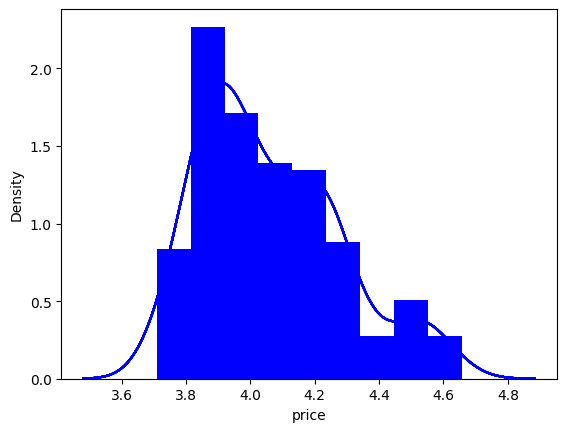

In [ ]:
for i in numeric_feature:
  sns.distplot(np.log10(df['price']), color="b")



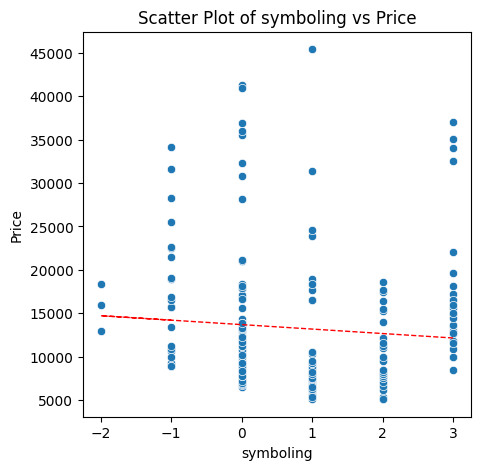

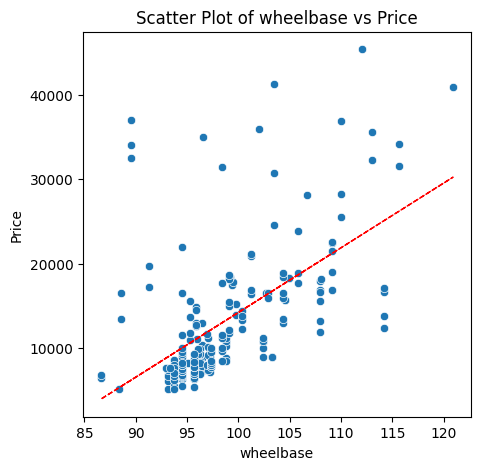

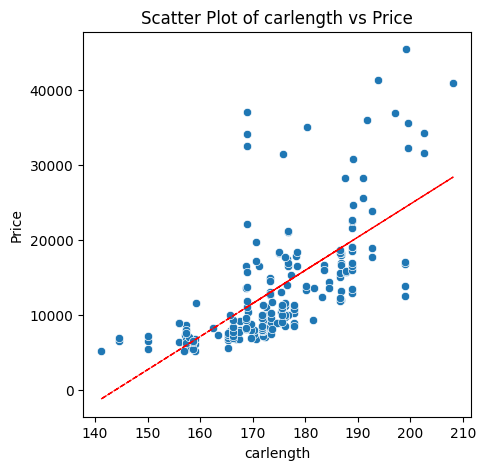

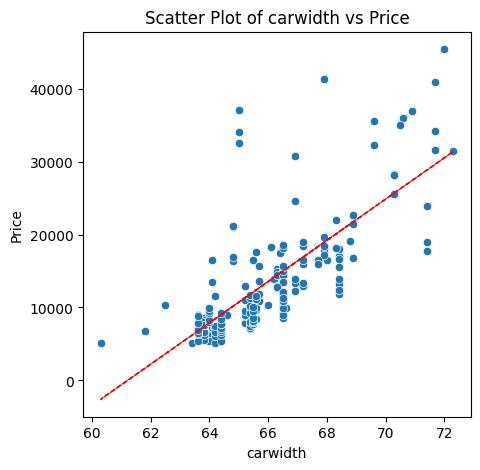

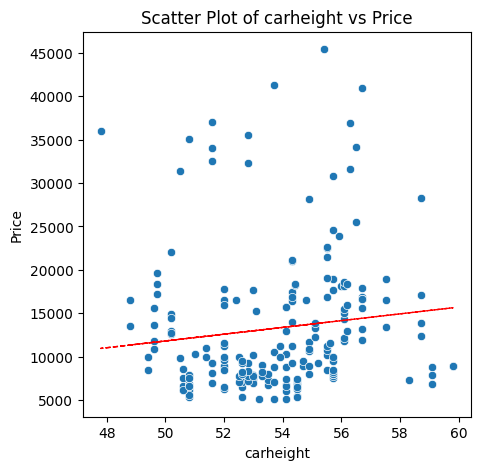

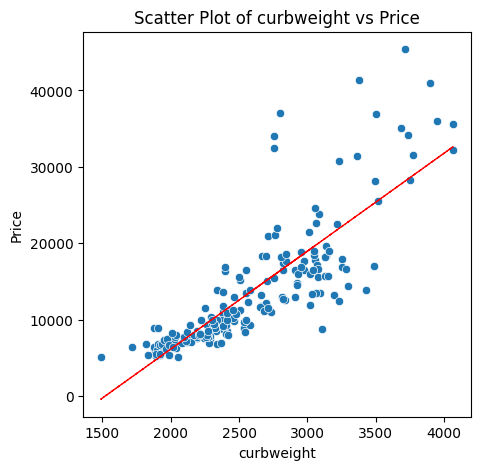

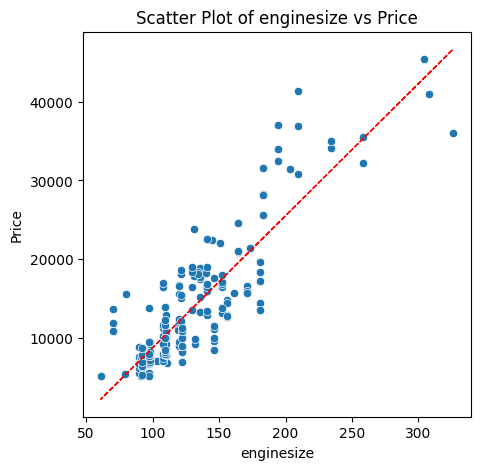

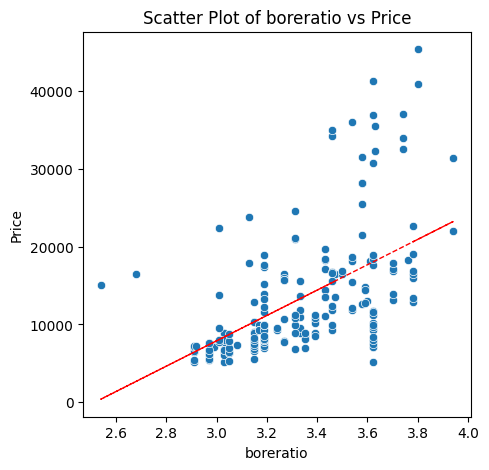

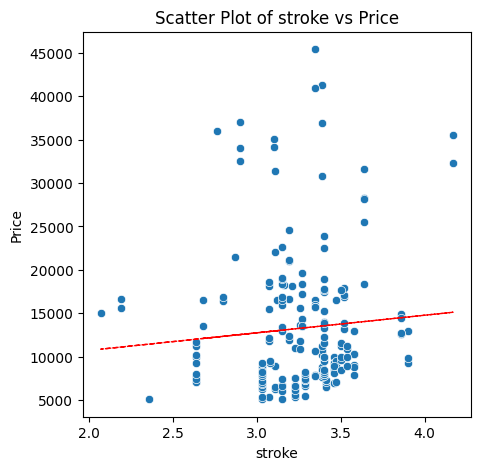

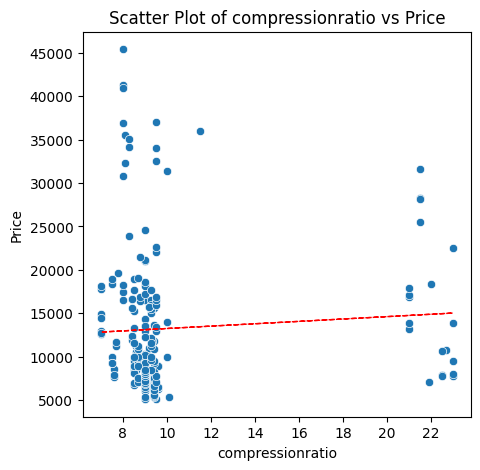

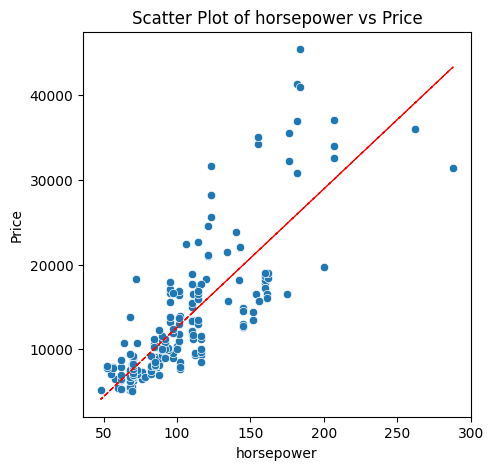

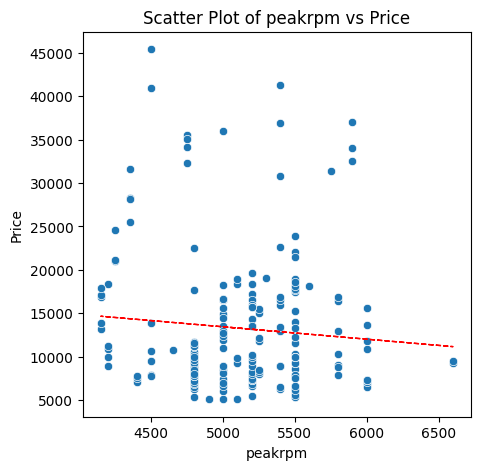

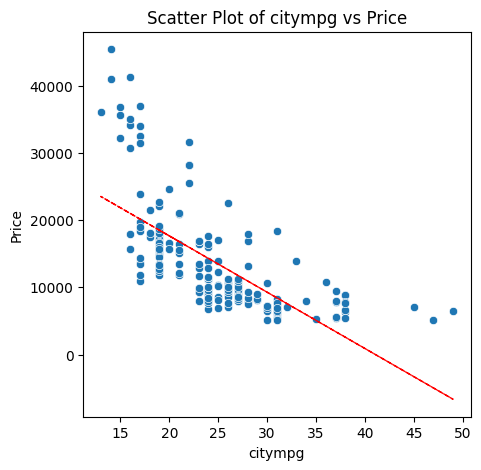

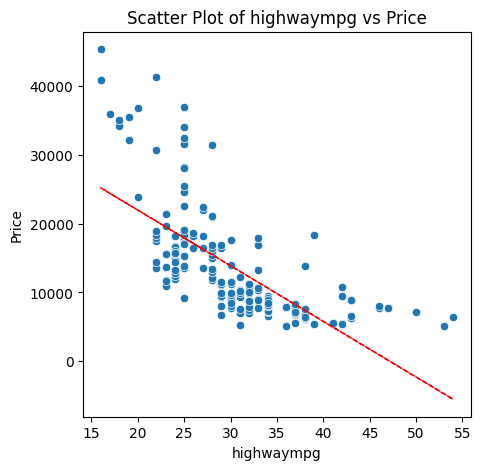

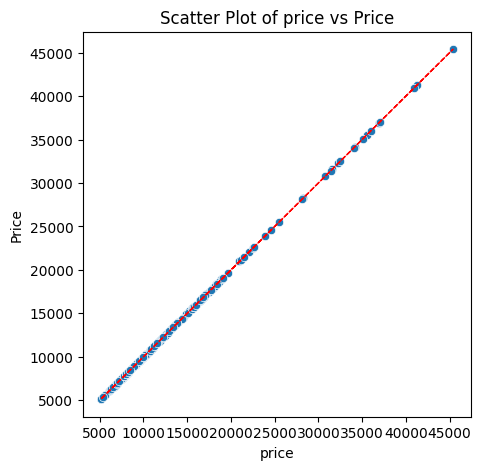

In [ ]:
for col in numeric_feature[1:]:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca()

    sns.scatterplot(x=col, y="price", data=df, ax=ax)

    ax.set_title(f"Scatter Plot of {col} vs Price")
    ax.set_xlabel(col)
    ax.set_ylabel("Price")
    z=np.polyfit(df[col], df['price'], 1)
    y_hat=np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()


##z = np.polyfit(dataset[col], dataset['price'], 1): This line fits a polynomial of degree 1 (a linear polynomial) to the data. It calculates the coefficients of the polynomial that best fits the relationship between the independent variable dataset[col] and the dependent variable dataset['price']. The result z will contain the coefficients of the polynomial, with the first element representing the slope and the second representing the intercept.
##y_hat = np.poly1d(z)(dataset[col]): This line computes the predicted values of the dependent variable ('price') based on the fitted polynomial. It uses the poly1d function from NumPy to create a polynomial function using the coefficients z. Then, it applies this function to the independent variable dataset[col] to get the predicted values y_hat.
##plt.plot(dataset[col], y_hat, "r--", lw=1): This line plots the original data points against the predicted values obtained from the polynomial regression. It uses Matplotlib's plot function to create a line plot. The first argument dataset[col] represents the independent variable, the second argument y_hat represents the predicted values, "r--" specifies that the line should be red and dashed, and lw=1 sets the line width to 1.

In [ ]:
numeric_feature[0]

'car_ID'

<Axes: >

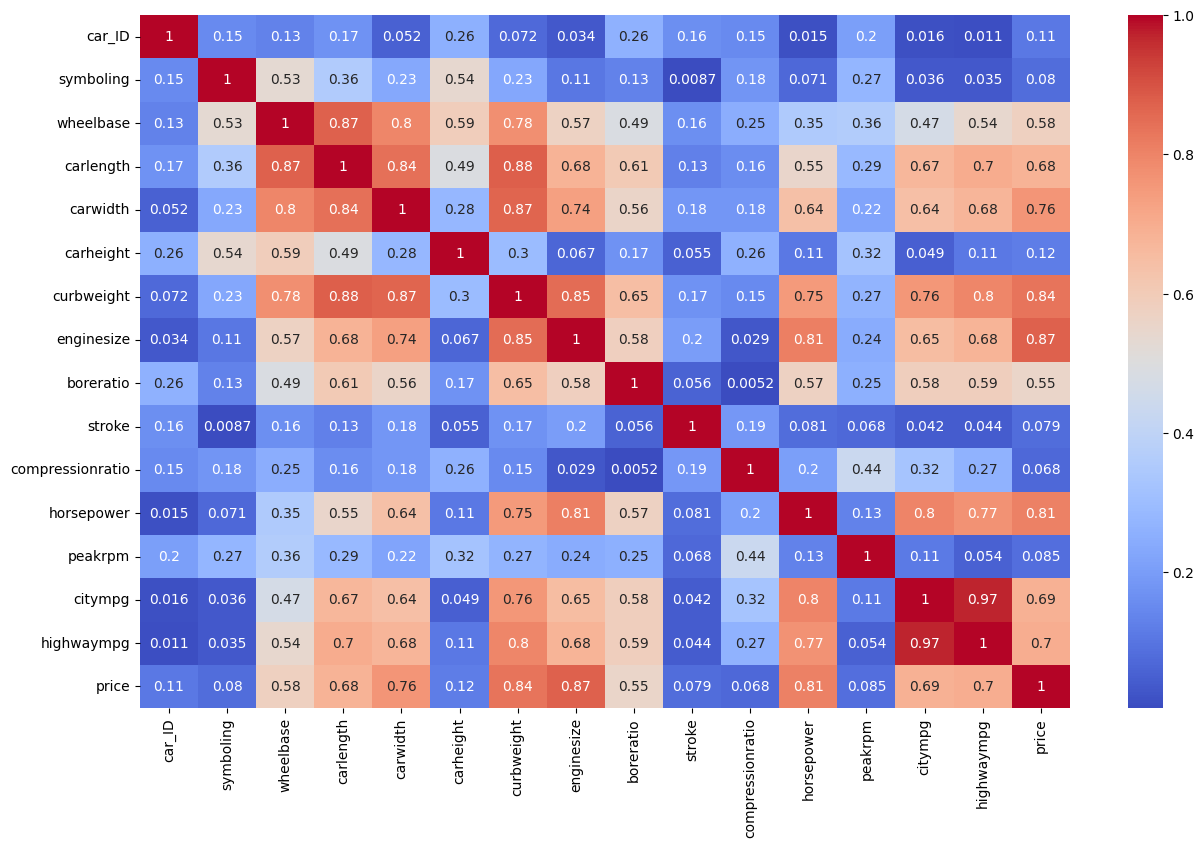

In [ ]:
plt.figure(figsize=(15,9))
correlation=numeric_df.corr()
correlation
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [ ]:
df['car_area']=df['carlength']*df['carwidth']
df['car_area']

0      10820.08
1      10820.08
2      11213.60
3      11690.92
4      11726.24
5      11754.99
6      13758.78
7      13758.78
8      13758.78
9      12099.78
10     11456.64
11     11456.64
12     11456.64
13     11456.64
14     12644.10
15     12644.10
16     13159.02
17     13967.30
18      8508.33
19      9915.24
20     10099.68
21     10035.74
22     10035.74
23     10035.74
24     10035.74
25     10035.74
26     10035.74
27     10035.74
28     11279.16
29     11483.16
30      9239.94
31      9239.94
32      9600.00
33      9600.00
34      9600.00
35     10457.60
36     10038.69
37     10921.00
38     10921.00
39     11436.08
40     10962.50
41     11436.08
42     11160.60
43     10549.26
44      9915.24
45      9915.24
46     11253.52
47     13892.16
48     13892.16
49     13534.02
50     10214.22
51     10214.22
52     10214.22
53     10708.56
54     10708.56
55     11103.30
56     11103.30
57     11103.30
58     11103.30
59     11823.70
60     11823.70
61     11823.70
62     1

In [ ]:
df['mileage']= 0.6*df['citympg'] + 0.4*df['highwaympg']
df['mileage']

0      23.4
1      23.4
2      21.8
3      26.4
4      19.6
5      21.4
6      21.4
7      21.4
8      18.2
9      18.4
10     25.4
11     25.4
12     23.8
13     23.8
14     22.0
15     18.4
16     18.4
17     17.0
18     49.4
19     40.0
20     40.0
21     38.6
22     33.8
23     26.4
24     33.8
25     33.8
26     33.8
27     26.4
28     26.4
29     21.0
30     51.0
31     33.8
32     39.6
33     31.6
34     31.6
35     31.6
36     31.6
37     29.4
38     29.4
39     29.4
40     29.4
41     25.6
42     27.4
43     26.0
44     40.0
45     40.0
46     26.0
47     16.6
48     16.6
49     14.6
50     30.4
51     33.8
52     33.8
53     33.8
54     33.8
55     19.4
56     19.4
57     19.4
58     18.8
59     28.4
60     28.4
61     28.4
62     28.4
63     38.4
64     28.4
65     22.2
66     34.2
67     23.2
68     23.2
69     23.2
70     23.2
71     16.8
72     16.8
73     14.8
74     14.8
75     21.0
76     38.6
77     33.8
78     33.8
79     26.4
80     25.8
81     27.8
82     21.0
83  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  df_vif= pd.DataFrame()
  df_vif['variables']=x.columns
  df_vif['vif']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return(df_vif)

In [ ]:
cal_vif(df[[col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in ['price','stroke','enginesize', 'horsepower','curbweight', 'peakrpm', 'boreratio', 'carheight','car_ID', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'wheelbase', 'car_area']]])

,variables,vif
0,symboling,1.435090
1,compressionratio,7.651683
2,mileage,8.470271


In [ ]:
numerical_feature = ['symboling', 'compressionratio', 'mileage']


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_area', 'mileage'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['company'] = df['CarName'].str.split(' ', expand=True)[0]

df['company']= df['company'].replace({'toyouta': 'toyota','vw':'volkswagen','vokswagen':'volkswagen',
                                                      'maxda':'mazda', 'Nissan': 'nissan', 'Mazda':'mazda','porcshce':'porsche'})

df['company'].value_counts()

company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [ ]:
df_categorical= df.describe(include=['object','category']).columns

In [ ]:
df_categorical

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }


In [ ]:
encoders_nums= {'fueltype': {'diesel':1, 'gas':0},
                'cylindernumber':{"four":4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12},
                'doornumber':{'four':4, 'two':2},
                'aspiration':{'std':1, 'turbo':'0'}
                }

In [ ]:
df1=df.copy()
df1.replace(encoders_nums, inplace=True)
df1.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,mileage,company
0,1,3,alfa-romero giulia,0,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,23.4,alfa-romero
1,2,3,alfa-romero stelvio,0,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,23.4,alfa-romero
2,3,1,alfa-romero Quadrifoglio,0,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,21.8,alfa-romero
3,4,2,audi 100 ls,0,1,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,26.4,audi
4,5,2,audi 100ls,0,1,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,19.6,audi


In [ ]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [ ]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [ ]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [ ]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [ ]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [ ]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [ ]:
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [ ]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [ ]:
df1= pd.get_dummies(df1, columns=['carbody',
        'enginetype', 'fuelsystem'], prefix=["body","etype","fsystem"], dtype=int)

In [ ]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,mileage,company,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_dohc,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,1,2,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,23.4,alfa-romero,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,1,2,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,23.4,alfa-romero,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,1,2,rwd,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,21.8,alfa-romero,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,1,4,fwd,front,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,26.4,audi,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,1,4,4wd,front,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,19.6,audi,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='company', ylabel='price'>

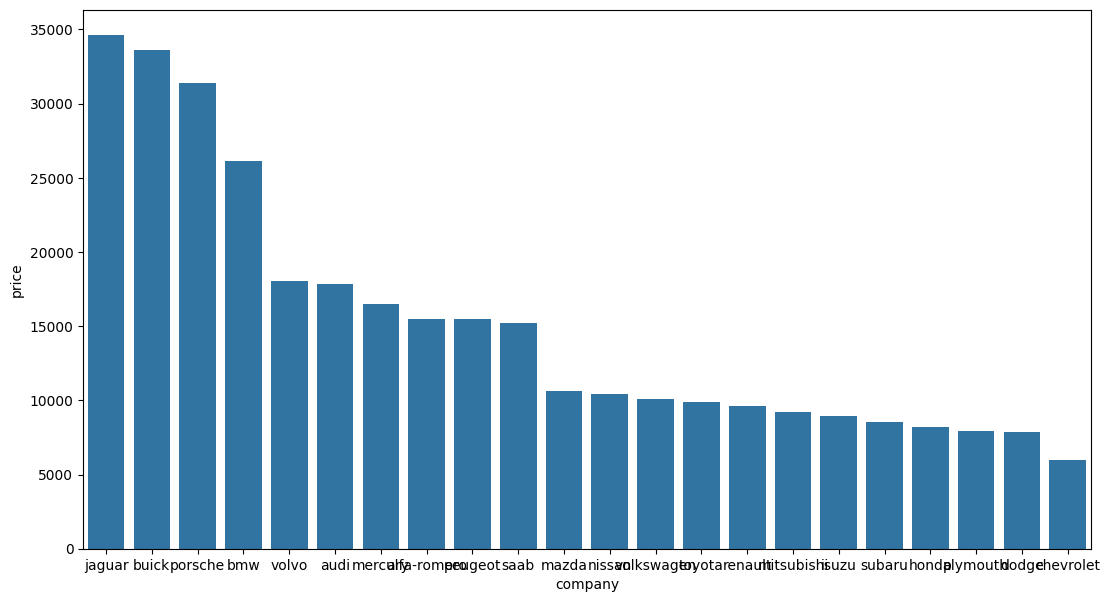

In [ ]:
df2= pd.DataFrame(df1.groupby(['company'])['price'].mean().sort_values(ascending=False))
plt.figure(figsize=(13,7))
sns.barplot(x=df2.index, y='price', data=df2)

In [ ]:
df2.index

Index(['jaguar', 'buick', 'porsche', 'bmw', 'volvo', 'audi', 'mercury',
       'alfa-romero', 'peugeot', 'saab', 'mazda', 'nissan', 'volkswagen',
       'toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda',
       'plymouth', 'dodge', 'chevrolet'],
      dtype='object', name='company')

In [ ]:
df2.rename(columns={'price':'price_mean'},inplace=True)

In [ ]:
df1=df1.merge(df2, on='company', how='left')

In [ ]:
df1['company_cat']=df1['price_mean'].apply(lambda x:0 if x < 12000 else (1 if 12000<=x<24000 else 2))
df1['company_cat'].value_counts()

company_cat
0    142
1     39
2     24
Name: count, dtype: int64

In [ ]:
df1.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_area            0
mileage             0
company             0
body_convertible    0
body_hardtop        0
body_hatchback      0
body_sedan          0
body_wagon          0
etype_dohc          0
etype_dohcv         0
etype_l             0
etype_ohc           0
etype_ohcf          0
etype_ohcv          0
etype_rotor         0
fsystem_1bbl        0
fsystem_2bbl        0
fsystem_4bbl        0
fsystem_idi         0
fsystem_mfi         0
fsystem_mpfi        0
fsystem_spdi        0
fsystem_sp

In [ ]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,mileage,company,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_dohc,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi,price_mean,company_cat
0,1,3,alfa-romero giulia,0,1,2,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,23.4,alfa-romero,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15498.333333,1
1,2,3,alfa-romero stelvio,0,1,2,rwd,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,23.4,alfa-romero,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,0,1,2,rwd,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,21.8,alfa-romero,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,15498.333333,1
3,4,2,audi 100 ls,0,1,4,fwd,front,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,26.4,audi,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,17859.166714,1
4,5,2,audi 100ls,0,1,4,4wd,front,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,19.6,audi,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,17859.166714,1


In [ ]:
feature= numerical_feature.copy()
feature.extend(['fueltype', 'aspiration', 'doornumber',
       'cylindernumber', 'company_cat',
       'body_convertible',	'body_hardtop',	'body_hatchback',	'body_sedan',	'body_wagon',
                          'etype_dohc', 'etype_dohcv',	'etype_l',	'etype_ohc',	'etype_ohcf', 'etype_ohcv',	'etype_rotor',
                          'fsystem_1bbl', 	'fsystem_2bbl',	'fsystem_4bbl',	'fsystem_idi',	'fsystem_mfi',	'fsystem_mpfi',	'fsystem_spdi',	'fsystem_spfi'])

feature

['symboling',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_dohcv',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'etype_rotor',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_4bbl',
 'fsystem_idi',
 'fsystem_mfi',
 'fsystem_mpfi',
 'fsystem_spdi',
 'fsystem_spfi']

In [ ]:
len(feature)

28

In [ ]:
df1[feature].isnull().sum()


symboling           0
compressionratio    0
mileage             0
fueltype            0
aspiration          0
doornumber          0
cylindernumber      0
company_cat         0
body_convertible    0
body_hardtop        0
body_hatchback      0
body_sedan          0
body_wagon          0
etype_dohc          0
etype_dohcv         0
etype_l             0
etype_ohc           0
etype_ohcf          0
etype_ohcv          0
etype_rotor         0
fsystem_1bbl        0
fsystem_2bbl        0
fsystem_4bbl        0
fsystem_idi         0
fsystem_mfi         0
fsystem_mpfi        0
fsystem_spdi        0
fsystem_spfi        0
dtype: int64

In [ ]:
for col in feature:
    df1[col] = pd.to_numeric(df1[col])


In [ ]:
df1[feature] = pd.to_numeric(feature, errors='coerce')


In [ ]:
df1[feature].dtypes

symboling             int64
compressionratio    float64
mileage             float64
fueltype              int64
aspiration            int64
doornumber            int64
cylindernumber        int64
company_cat           int64
body_convertible      int64
body_hardtop          int64
body_hatchback        int64
body_sedan            int64
body_wagon            int64
etype_dohc            int64
etype_dohcv           int64
etype_l               int64
etype_ohc             int64
etype_ohcf            int64
etype_ohcv            int64
etype_rotor           int64
fsystem_1bbl          int64
fsystem_2bbl          int64
fsystem_4bbl          int64
fsystem_idi           int64
fsystem_mfi           int64
fsystem_mpfi          int64
fsystem_spdi          int64
fsystem_spfi          int64
dtype: object

In [ ]:
df1[feature].isnull().sum()

symboling           0
compressionratio    0
mileage             0
fueltype            0
aspiration          0
doornumber          0
cylindernumber      0
company_cat         0
body_convertible    0
body_hardtop        0
body_hatchback      0
body_sedan          0
body_wagon          0
etype_dohc          0
etype_dohcv         0
etype_l             0
etype_ohc           0
etype_ohcf          0
etype_ohcv          0
etype_rotor         0
fsystem_1bbl        0
fsystem_2bbl        0
fsystem_4bbl        0
fsystem_idi         0
fsystem_mfi         0
fsystem_mpfi        0
fsystem_spdi        0
fsystem_spfi        0
dtype: int64

In [ ]:
from scipy.stats import zscore
x= df1[feature].apply(zscore)
y=np.log10(df1['price'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(164, 28)
(41, 28)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,  y_train)

In [ ]:
reg.score(x_train,  y_train)

0.9155748034534834

In [ ]:
reg.coef_

array([-6.68665790e-04, -4.88768926e-02, -7.86479150e-02,  3.76323234e-02,
       -1.36114300e-02,  2.00095262e-02,  4.57947011e-02,  8.35039366e-02,
        1.68010688e-02,  9.38454650e-03, -3.68046175e-04, -2.60145442e-03,
       -9.70773339e-03,  1.69543082e-03, -1.04083409e-17, -1.40423473e-02,
        1.02636941e-04, -4.16196461e-05, -3.94559531e-03,  2.76534326e-02,
       -4.58677099e-03, -2.62003403e-02, -7.86111289e-03,  3.76323234e-02,
        8.21798602e-04,  8.73285754e-03, -8.12870900e-03,  4.44223513e-03])

In [ ]:
reg.intercept_

4.058191068601193

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([3.83374634, 4.16146163, 4.21911986, 3.53910712, 3.99454006,
       4.04029993, 3.77122331, 3.90276493, 4.12217972, 3.89314939,
       4.34870133, 4.45350665, 4.1042543 , 4.01478538, 3.78907574,
       3.99106317, 4.01334771, 4.23552508, 3.92230293, 3.87406634,
       3.99804971, 4.16398538, 4.00084149, 3.99106317, 4.14664534,
       3.84232762, 3.88205289, 4.13953234, 3.91501546, 3.82912916,
       3.94991565, 3.99538445, 4.27942755, 3.98128839, 3.86944915,
       4.42521864, 4.10559909, 4.21200903, 3.8288122 , 4.58966885,
       3.74821748])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

MSE : 0.0073914899922264965
